In [111]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump


In [112]:
pd.set_option("display.max_row", 500)
pd.set_option("display.max_columns", 150)

pd.set_option('display.max_colwidth', None)

pd.set_option('display.precision', 2)

pd.set_option('display.float_format', '{:.2f}'.format)


In [113]:
# column_values = df['Subtype'].tolist()
# print(column_values)

# df['Houses'] = df['Subtype'].apply(lambda x: 'House' if x == 'House' else None)
# df.loc[df['Subtype'] == 'House'] = 'House'
# df.dropna(subset=['New Column'], inplace=True)

# selected_rows = df[df['column1'] == 'desired_value']
# selected_value = df.loc[index, 'column1']
# selected_value = df.at[index, 'column1']
# df['new_column'] = df['column1'] + df['column2']

In [114]:
# df['Houses'] == df['Garden surface'].value_counts
# # df['Apartments'] = (df['Subtype'].isin(['Apartment', 'Duplex'])).astype(int)

# count = (df['Houses'] == df['Garden surface']).sum()
# print(count)
# count = (df['Apartments'] == df['Garden surface']).sum()
# print(count)

# value_counts = (df['Subtype'] == 'House').value_counts()
# print(value_counts)

# df['Houses'] = df['Subtype'] == 'House'

# df['Houses'] = (df['Subtype'] == 'House').astype(int)

In [115]:
# original_df = pd.read_csv("full.csv", skipinitialspace=True, low_memory=False)


In [116]:
df = pd.read_csv("last_one.csv", skipinitialspace=True, low_memory=False)


In [117]:
def detect_outliers(df, column):
   
    threshold = 3
    outliers = []

    mean = np.mean(df[column])
    std = np.std(df[column])

    for value in df[column]:
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(str(value))

    return outliers

In [118]:
# Call the detect_outliers() function for the 'Price' column
outliers = detect_outliers(df, 'Price')

# Create a DataFrame from outliers
outliers_df = pd.DataFrame({'Outliers': outliers})

# Convert outliers to the same data type as 'Price' column
outliers = df['Price'].dtype.type(outliers)

# Filter the DataFrame to remove outliers
df_filtered = df[~df['Price'].isin(outliers)]

In [119]:
# Call the detect_outliers() function for the 'Living area' column
outliers_Bedrooms = detect_outliers(df, 'Bedrooms')

# Create a DataFrame from outliers
outliers_Bedrooms_df = pd.DataFrame({'outliers_Bedrooms': outliers_Bedrooms})

# Convert outliers to the same data type as 'Living area' column
outliers_Bedrooms = df['Bedrooms'].dtype.type(outliers_Bedrooms)

# Filter the DataFrame to remove outliers
df = df[~df['Bedrooms'].isin(outliers_Bedrooms)]

In [120]:
# Call the detect_outliers() function for the 'Living area' column
outliers_Primary_energy_consumption = detect_outliers(df, "Primary energy consumption")

# Create a DataFrame from outliers
outliers_Primary_energy_consumption_df = pd.DataFrame({'outliers_Primary_energy_consumption': outliers_Primary_energy_consumption })

# Convert outliers to the same data type as 'Living area' column
outliers_Primary_energy_consumption  = df["Primary energy consumption"].dtype.type(outliers_Primary_energy_consumption )

# Filter the DataFrame to remove outliers
df = df[~df['Bedrooms'].isin(outliers_Primary_energy_consumption)]

In [121]:
df['Apartments'] = (df['Subtype'].isin(['Apartment', 'Duplex'])).astype(int)

df = df.drop('Subtype', axis=1)


In [122]:
df = df[['Price', 'Bedrooms', 'Living area', 'Postcode', "Number of floors", "Floor", "Apartments", "Primary energy consumption", "Heating type", 'Construction year', 'Kitchen type', 'Region', 'Building condition']]


In [123]:
dummy_df = pd.get_dummies(df['Region']).astype(int)


df = df.drop('Region', axis=1)

df = pd.concat([df, dummy_df], axis=1)



In [124]:
dummy_df = pd.get_dummies(df['Building condition'], prefix='Building_condition').astype(int)

df = df.drop('Building condition', axis=1)

df = pd.concat([df, dummy_df], axis=1)

# df.loc['Building condition'] = df.loc['Building condition'] = pd.to_numeric(df.loc["Building condition"])

In [125]:
count = (df['Apartments'] & df['Floor'].isna()).sum()
print(count)

1494


In [126]:
dummy_df = pd.get_dummies(df['Heating type'], prefix='Heating type').astype(int)

df = df.drop('Heating type', axis=1)

df = pd.concat([df, dummy_df], axis=1)

In [127]:
dummy_df = pd.get_dummies(df['Kitchen type'], prefix='Kitchen type').astype(int)

df = df.drop('Kitchen type', axis=1)

df = pd.concat([df, dummy_df], axis=1)

In [128]:
df = df.dropna()


In [129]:
apartments_with_1 = df[df['Apartments'] == 1]
apartments_with_0 = df[df['Apartments'] == 0]



# apartments_with_1.value_counts


In [130]:
# apartments_with_0.value_counts

In [131]:
df.shape

(2900, 31)

In [132]:
# numeric_columns = df.select_dtypes(include='number')

# correlation_matrix = numeric_columns.corr()

# plt.figure(figsize=(18, 10))  
# sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)

# # method='pearson'
# plt.title('Correlation Heatmap')


# plt.show()

In [133]:
X = df.drop("Price",axis=1)   #Feature Matrix
y = df["Price"] 

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2030, 30), (870, 30))

In [135]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [136]:
var_thres.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [137]:
sum(var_thres.get_support())


28

In [138]:
# Lets Find non-constant features 
len(X_train.columns[var_thres.get_support()])

28

In [139]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [140]:
for column in constant_columns:
    print(column)


Heating type_Carbon
Heating type_Wood


In [141]:
X_train.drop(constant_columns,axis=1, inplace=True)

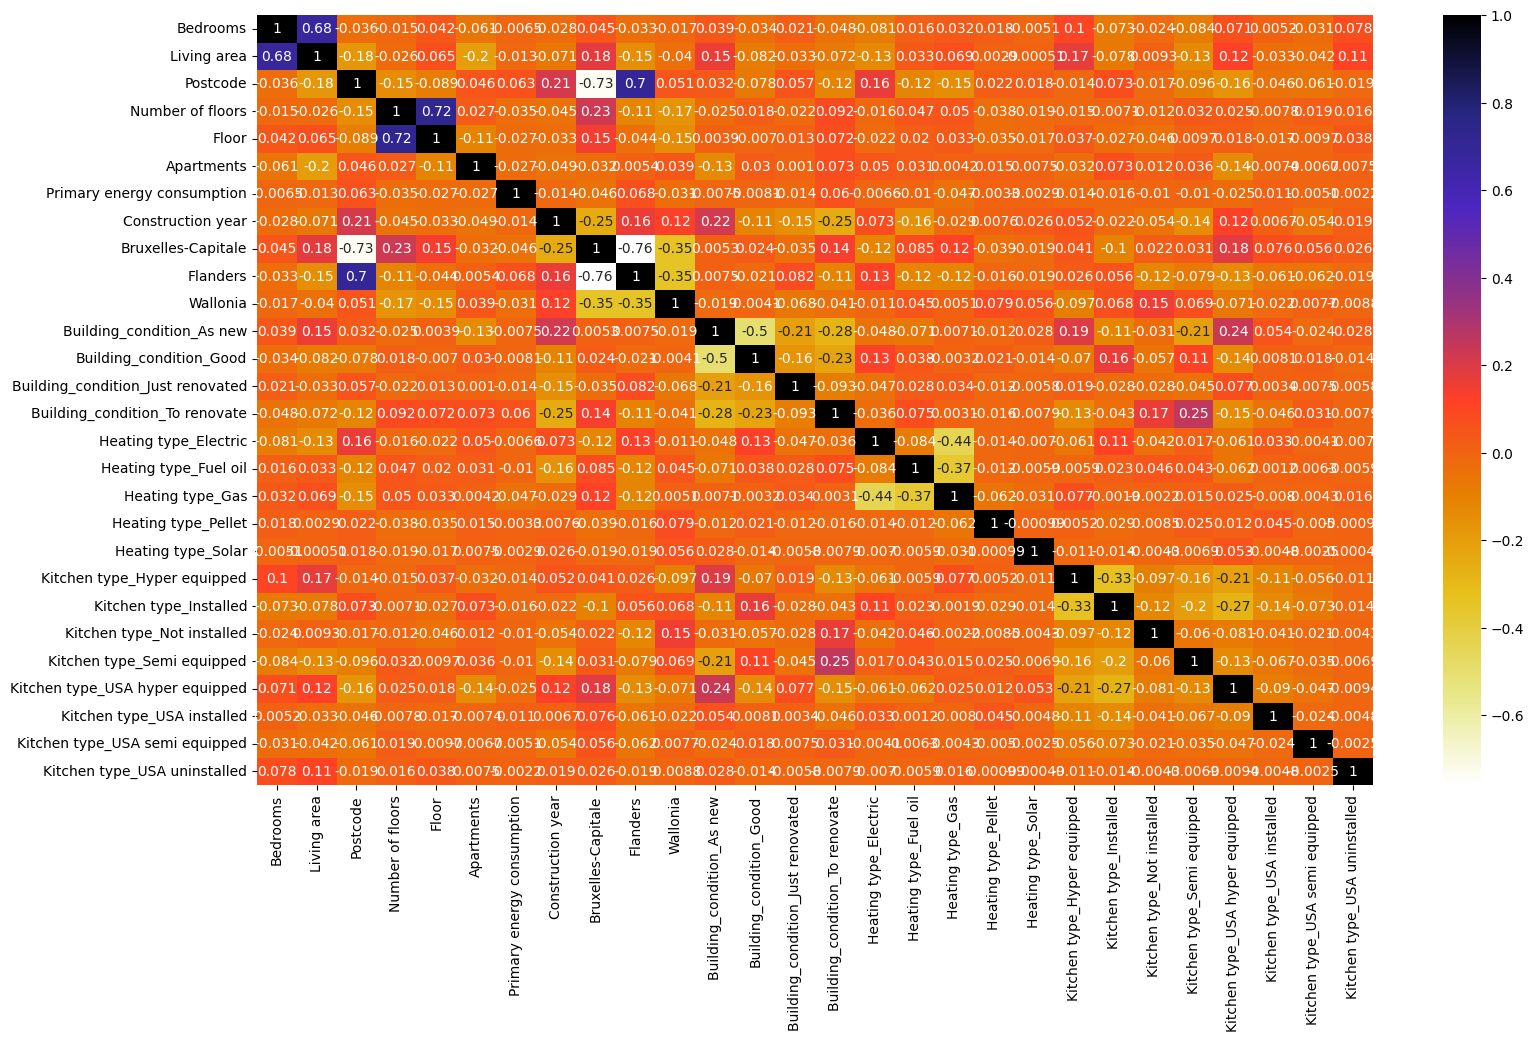

In [142]:
#Using Pearson Correlation
X_train.corr()
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [143]:
X_train.shape

(2030, 28)

In [144]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [145]:
correlation_dataframe=X_train.corr

In [146]:
# high_corr = np.where(correlation_dataframe.abs() > 0.5)
# high_corr = [(correlation_dataframe.index[x], correlation_dataframe.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

In [147]:
#corr_df = X_train.corr().abs()
#(corr_df * (corr_df > .7)).values.reshape(-1)

In [148]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))
corr_features

{'Bruxelles-Capitale', 'Flanders', 'Floor'}

In [149]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.17163995, 0.48632153, 0.34636294, 0.13012616, 0.09331024,
       0.01692541, 0.22048288, 0.22093212, 0.05430339, 0.0614817 ,
       0.04587549, 0.08523343, 0.03299864, 0.00655075, 0.03596784,
       0.04545947, 0.        , 0.01839035, 0.        , 0.01473775,
       0.03601114, 0.04275825, 0.0256559 , 0.0380687 , 0.04473818,
       0.01439712, 0.        , 0.01572745])

In [150]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Living area                         0.49
Postcode                            0.35
Construction year                   0.22
Primary energy consumption          0.22
Bedrooms                            0.17
Number of floors                    0.13
Floor                               0.09
Building_condition_As new           0.09
Flanders                            0.06
Bruxelles-Capitale                  0.05
Wallonia                            0.05
Heating type_Electric               0.05
Kitchen type_USA hyper equipped     0.04
Kitchen type_Installed              0.04
Kitchen type_Semi equipped          0.04
Kitchen type_Hyper equipped         0.04
Building_condition_To renovate      0.04
Building_condition_Good             0.03
Kitchen type_Not installed          0.03
Heating type_Gas                    0.02
Apartments                          0.02
Kitchen type_USA uninstalled        0.02
Heating type_Solar                  0.01
Kitchen type_USA installed          0.01
Building_conditi

<Axes: >

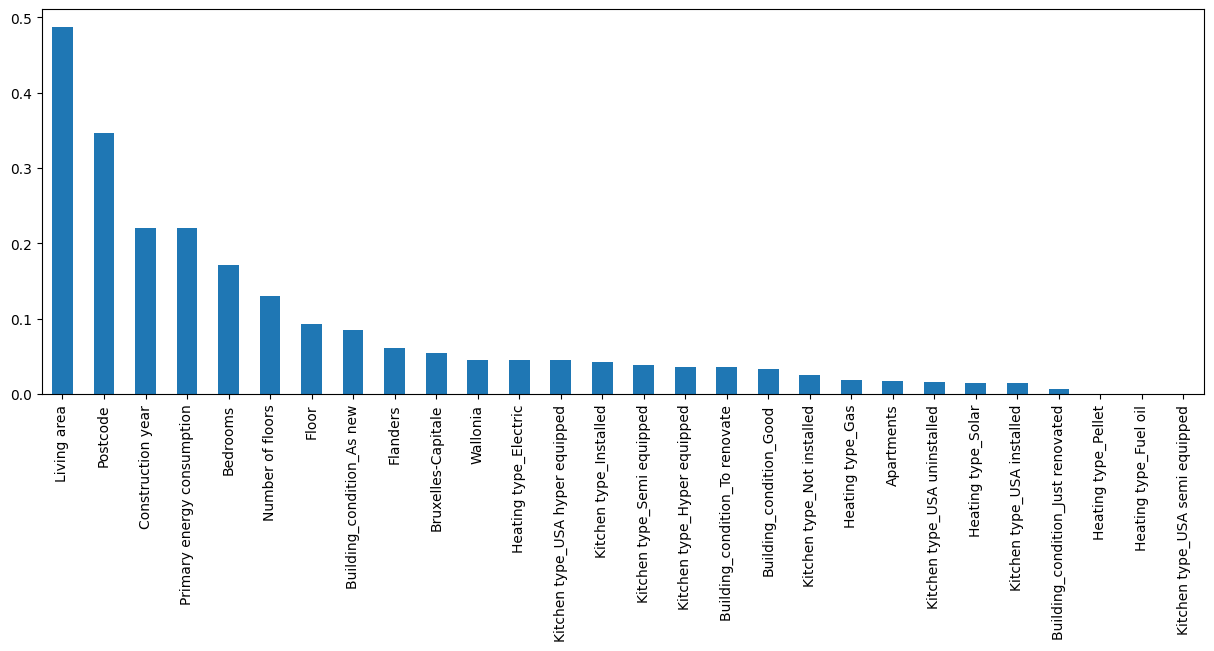

In [151]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))


In [152]:
from sklearn.feature_selection import SelectPercentile


## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x1696bdc60>)

In [153]:
selected_top_columns.get_support()


array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

In [154]:
X_train.columns[selected_top_columns.get_support()]


Index(['Bedrooms', 'Living area', 'Postcode', 'Number of floors',
       'Primary energy consumption', 'Construction year'],
      dtype='object')

In [155]:
df.describe(include="all")

,Price,Bedrooms,Living area,Postcode,Number of floors,Floor,Apartments,Primary energy consumption,Construction year,Bruxelles-Capitale,Flanders,Wallonia,Building_condition_As new,Building_condition_Good,Building_condition_Just renovated,Building_condition_To renovate,Heating type_Carbon,Heating type_Electric,Heating type_Fuel oil,Heating type_Gas,Heating type_Pellet,Heating type_Solar,Heating type_Wood,Kitchen type_Hyper equipped,Kitchen type_Installed,Kitchen type_Not installed,Kitchen type_Semi equipped,Kitchen type_USA hyper equipped,Kitchen type_USA installed,Kitchen type_USA semi equipped,Kitchen type_USA uninstalled
count,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00,2900.00
mean,442844.19,2.17,105.67,3970.67,5.22,3.89,0.89,325.11,1983.59,0.42,0.44,0.14,0.38,0.30,0.06,0.11,0.00,0.09,0.06,0.66,0.00,0.00,0.00,0.20,0.30,0.04,0.08,0.15,0.04,0.02,0.00
std,350822.70,0.79,48.09,3341.41,3.86,26.30,0.31,2062.25,32.78,0.49,0.50,0.34,0.49,0.46,0.24,0.31,0.00,0.29,0.24,0.47,0.05,0.03,0.00,0.40,0.46,0.19,0.27,0.36,0.21,0.12,0.03
min,39000.00,1.00,13.00,1000.00,1.00,1.00,0.00,1.00,1753.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,239000.00,2.00,76.00,1120.00,3.00,1.00,1.00,110.00,1966.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,320000.00,2.00,95.00,1970.00,4.00,2.00,1.00,168.00,1987.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,499000.00,3.00,120.00,8300.00,6.00,4.00,1.00,247.00,2011.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,2160000.00,6.00,500.00,9990.00,43.00,999.00,1.00,99999.00,2025.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [156]:
df["Primary energy consumption"].max()

99999.0

<Axes: xlabel='Price', ylabel='Primary energy consumption'>

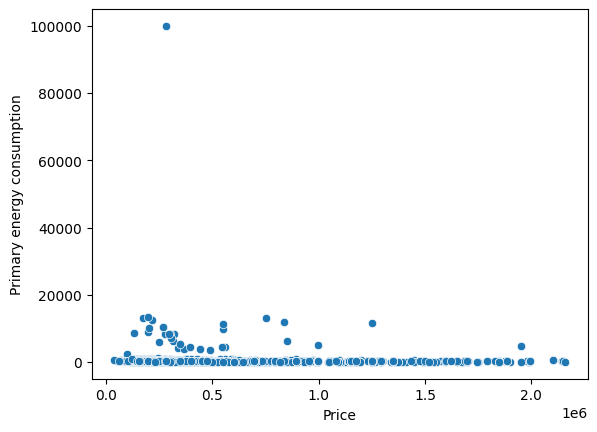

In [157]:
sns.scatterplot(df, x = "Price", y = "Primary energy consumption")

In [158]:
df = df.drop(df[df["Primary energy consumption"] == df["Primary energy consumption"].max()].index)


<Axes: xlabel='Price', ylabel='Primary energy consumption'>

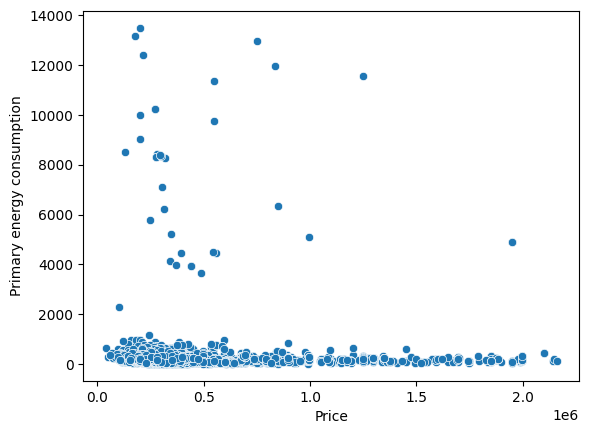

In [159]:
sns.scatterplot(df, x = "Price", y = "Primary energy consumption")

<Axes: xlabel='Living area', ylabel='Primary energy consumption'>

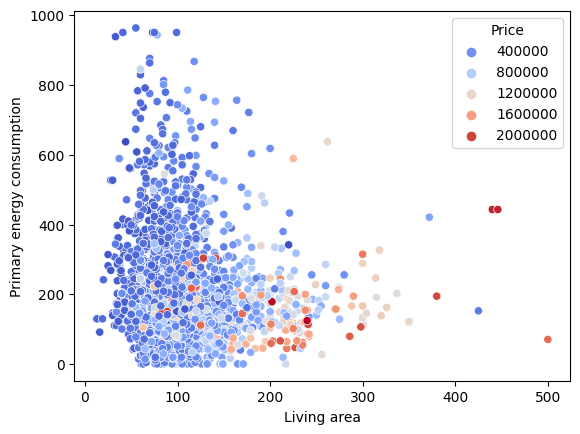

In [160]:
df = df[df["Primary energy consumption"] <= 1000]
sns.scatterplot(df, x = "Living area", y = "Primary energy consumption", hue = 'Price',  palette="coolwarm")

<Axes: xlabel='Price', ylabel='Living area'>

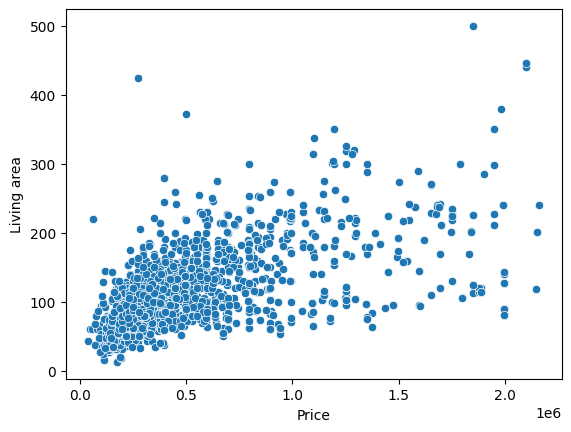

In [161]:
df['Living area'].max()

sns.scatterplot(df, x = "Price", y = 'Living area' )

In [162]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.17997492, 0.47043546, 0.33371949, 0.13390739, 0.0772511 ,
       0.03611921, 0.22139819, 0.21295611, 0.0870546 , 0.06217397,
       0.05100743, 0.06817949, 0.02290471, 0.01070075, 0.05328971,
       0.03534965, 0.        , 0.03224147, 0.        , 0.01555547,
       0.03050287, 0.03132319, 0.01170345, 0.05358547, 0.0554907 ,
       0.        , 0.0045665 , 0.00344522])

In [163]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Living area                         0.47
Postcode                            0.33
Primary energy consumption          0.22
Construction year                   0.21
Bedrooms                            0.18
Number of floors                    0.13
Bruxelles-Capitale                  0.09
Floor                               0.08
Building_condition_As new           0.07
Flanders                            0.06
Kitchen type_USA hyper equipped     0.06
Kitchen type_Semi equipped          0.05
Building_condition_To renovate      0.05
Wallonia                            0.05
Apartments                          0.04
Heating type_Electric               0.04
Heating type_Gas                    0.03
Kitchen type_Installed              0.03
Kitchen type_Hyper equipped         0.03
Building_condition_Good             0.02
Heating type_Solar                  0.02
Kitchen type_Not installed          0.01
Building_condition_Just renovated   0.01
Kitchen type_USA semi equipped      0.00
Kitchen type_USA

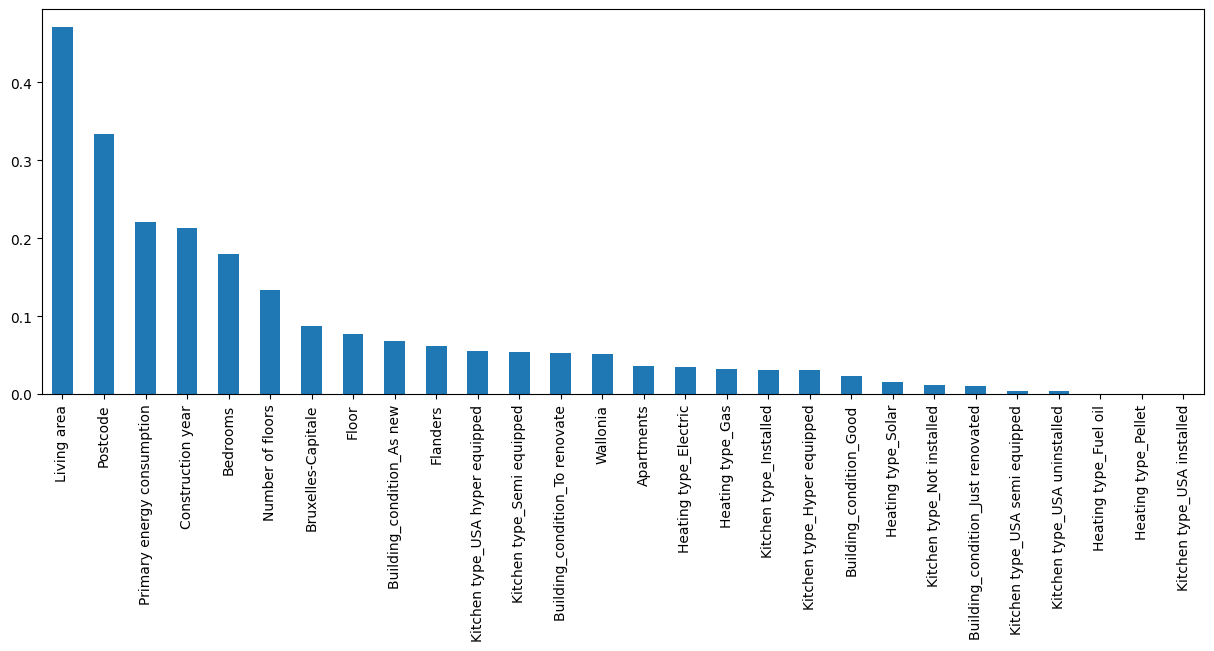

In [164]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.show()

In [165]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((2320, 30), (580, 30))

In [166]:
train_data = X_train.join(y_train)

In [167]:
from sklearn.feature_selection import chi2

f_p_values  =  chi2(X_train, y_train)

In [168]:
f_p_values

(array([3.08225738e+02, 3.16174035e+04, 2.09599059e+06, 1.68607481e+03,
        6.99528953e+04, 8.33253860e+01, 2.64561059e+06, 4.43555011e+02,
        4.19282471e+02, 4.11574189e+02, 6.71300772e+02, 4.62882431e+02,
        4.09354915e+02, 5.73037448e+02, 5.07296944e+02,            nan,
        4.77470278e+02, 3.82051149e+02, 1.96306609e+02, 1.34242857e+03,
        1.20440000e+03,            nan, 5.46450898e+02, 3.87462052e+02,
        6.37331188e+02, 5.02038730e+02, 6.75230202e+02, 3.93017063e+02,
        5.15074827e+02, 4.63000000e+02]),
 array([1.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.85018502e-130,
        0.00000000e+000, 1.00000000e+000, 0.00000000e+000, 9.46212390e-001,
        9.92946976e-001, 9.96832429e-001, 1.44699919e-007, 8.30982233e-001,
        9.97521657e-001, 7.26907858e-003, 3.18405801e-001,             nan,
        6.83877138e-001, 9.99932759e-001, 1.00000000e+000, 9.00142271e-080,
        2.44464326e-061,             nan, 4.79192453e-002, 9.99849531e-001

In [169]:
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values.sort_index(ascending=True)

Apartments                          1.00
Bedrooms                            1.00
Bruxelles-Capitale                  0.99
Building_condition_As new           0.83
Building_condition_Good             1.00
Building_condition_Just renovated   0.01
Building_condition_To renovate      0.32
Construction year                   0.95
Flanders                            1.00
Floor                               0.00
Heating type_Carbon                  NaN
Heating type_Electric               0.68
Heating type_Fuel oil               1.00
Heating type_Gas                    1.00
Heating type_Pellet                 0.00
Heating type_Solar                  0.00
Heating type_Wood                    NaN
Kitchen type_Hyper equipped         0.05
Kitchen type_Installed              1.00
Kitchen type_Not installed          0.00
Kitchen type_Semi equipped          0.38
Kitchen type_USA hyper equipped     0.00
Kitchen type_USA installed          1.00
Kitchen type_USA semi equipped      0.24
Kitchen type_USA

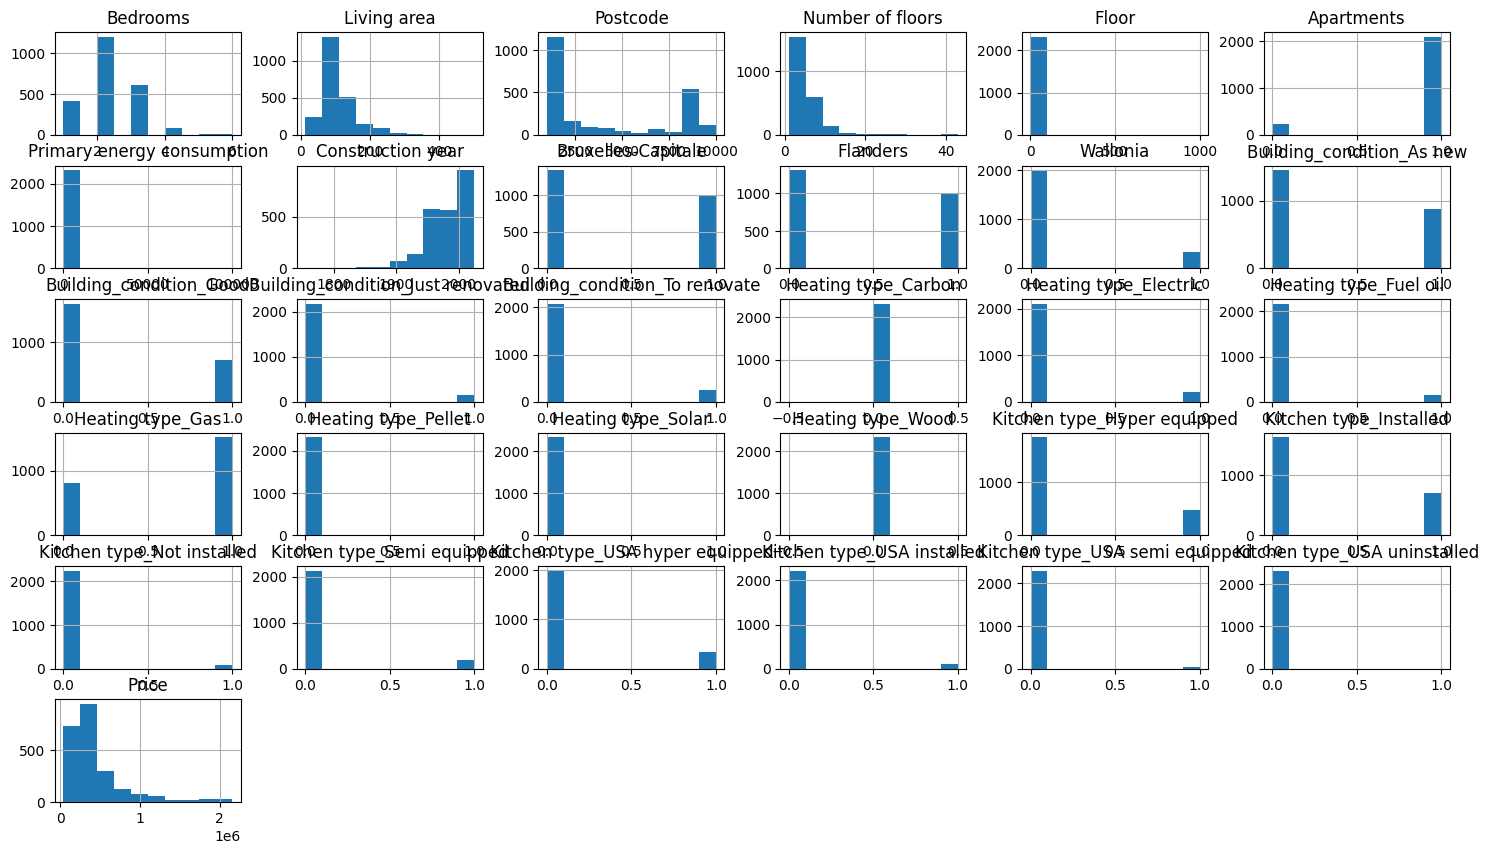

In [170]:
train_data.hist(figsize=(18,10))

plt.show()

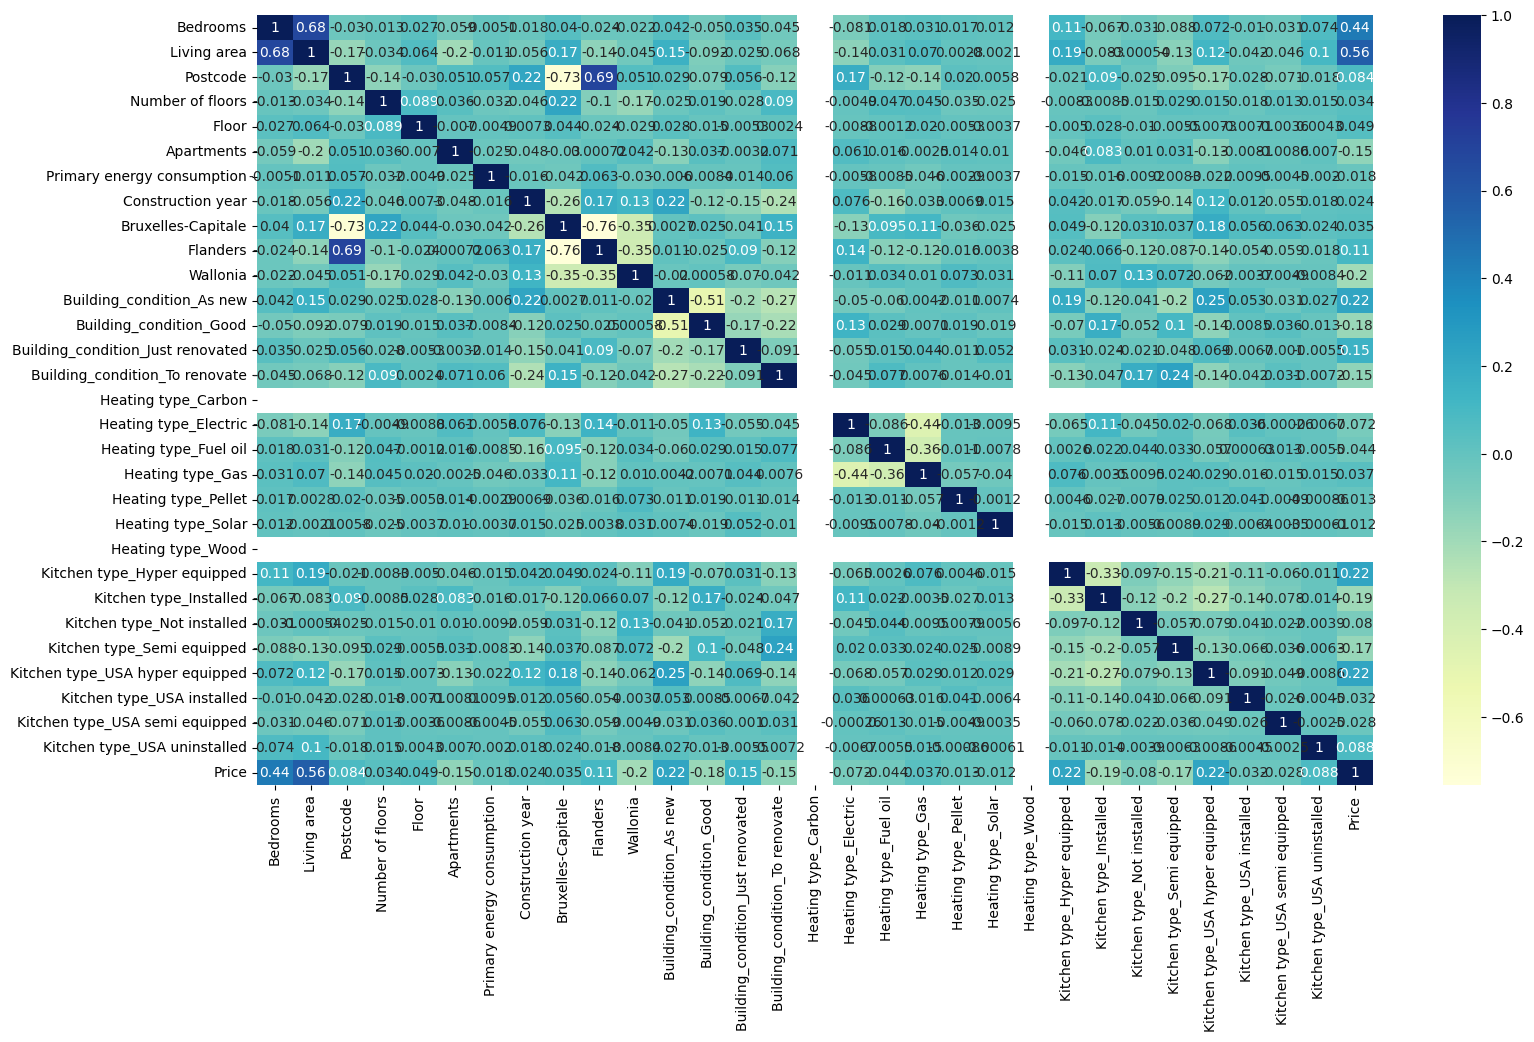

In [171]:
plt.figure(figsize=(18,10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

plt.show()

In [172]:
# df_log = train_data.drop("Price", axis=1).applymap(lambda x: np.log(x + 1))


In [173]:
# train_data = train_data.applymap(lambda x: np.log(x + 1))
# train_data.hist(figsize=(13,10))

# plt.show()

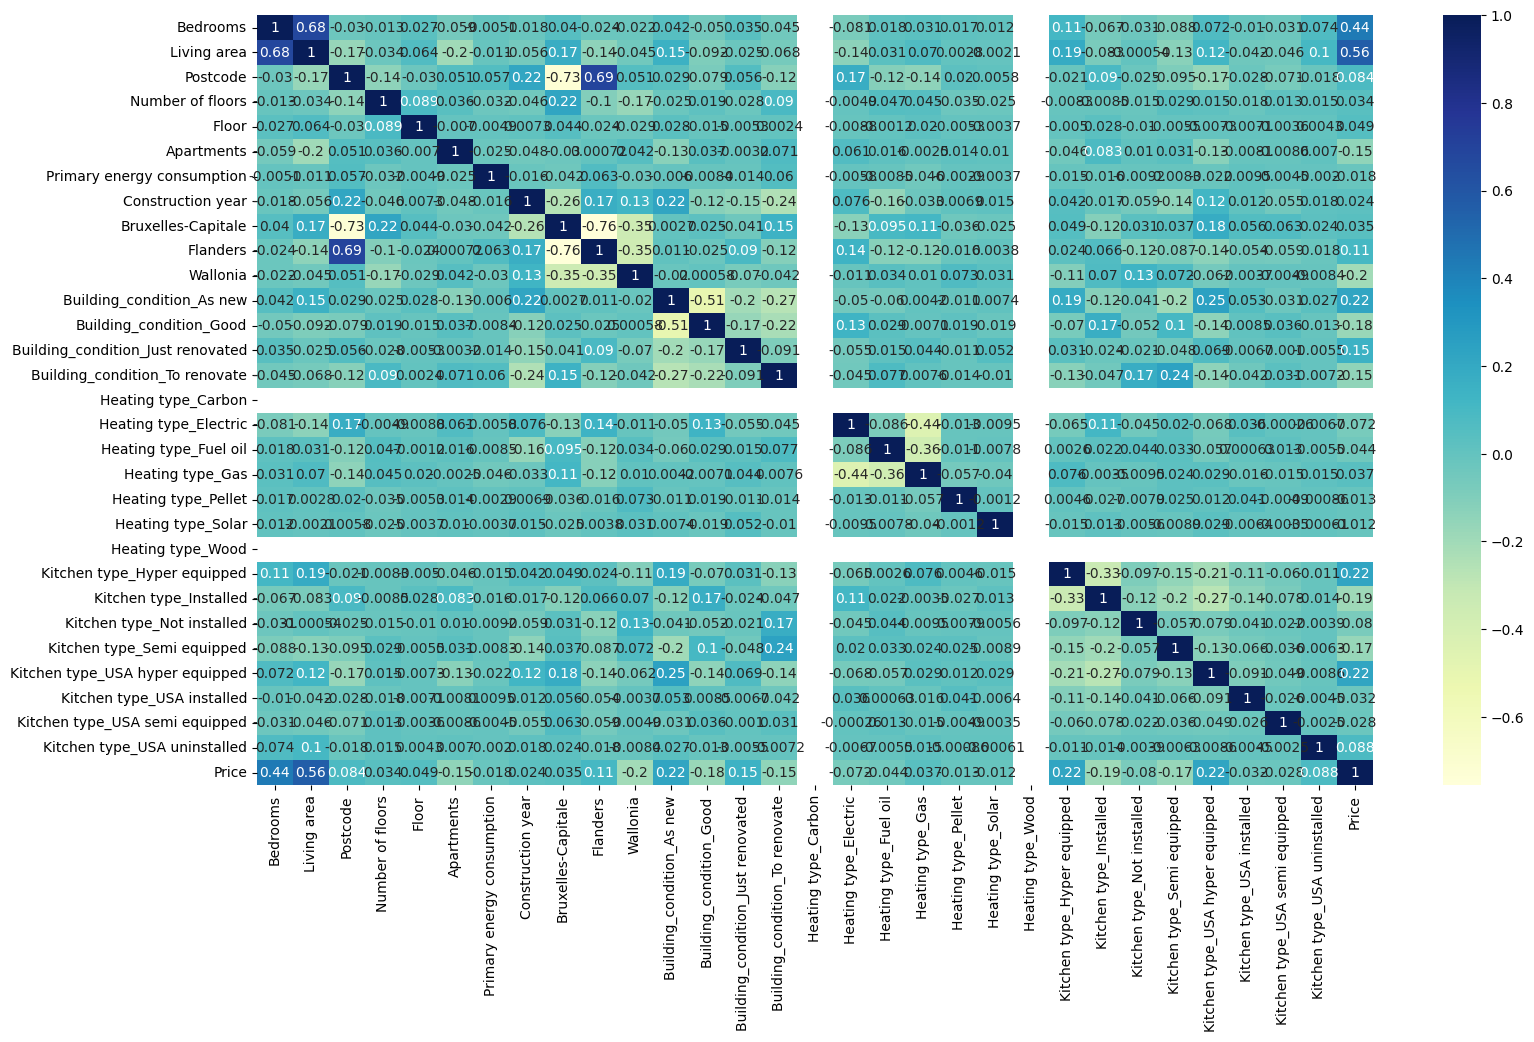

In [174]:
plt.figure(figsize=(18,10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

plt.show()

In [175]:
X_train.columns

Index(['Bedrooms', 'Living area', 'Postcode', 'Number of floors', 'Floor',
       'Apartments', 'Primary energy consumption', 'Construction year',
       'Bruxelles-Capitale', 'Flanders', 'Wallonia',
       'Building_condition_As new', 'Building_condition_Good',
       'Building_condition_Just renovated', 'Building_condition_To renovate',
       'Heating type_Carbon', 'Heating type_Electric', 'Heating type_Fuel oil',
       'Heating type_Gas', 'Heating type_Pellet', 'Heating type_Solar',
       'Heating type_Wood', 'Kitchen type_Hyper equipped',
       'Kitchen type_Installed', 'Kitchen type_Not installed',
       'Kitchen type_Semi equipped', 'Kitchen type_USA hyper equipped',
       'Kitchen type_USA installed', 'Kitchen type_USA semi equipped',
       'Kitchen type_USA uninstalled'],
      dtype='object')

In [176]:
y_train

7255     890000.00
11030    142000.00
977      105000.00
4820     475000.00
11487    595000.00
           ...    
4210     765100.00
4455     745000.00
9351     165000.00
15243    224000.00
16552   1830000.00
Name: Price, Length: 2320, dtype: float64

In [177]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()

reg.fit(X_train, y_train)

reg.score(X_train, y_train)

0.4741304495462212

In [178]:

reg.score(X_test, y_test)

0.4538453386734369

SCaler

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train) 


reg = LinearRegression()

reg.fit(X_train_s, y_train)

reg.score(X_train_s, y_train)

0.47412928696584855

In [180]:

X_test_s = scaler.transform(X_test) 
reg.score(X_test_s, y_test)

0.4537732872755875

random forest

In [181]:
X_train.columns

Index(['Bedrooms', 'Living area', 'Postcode', 'Number of floors', 'Floor',
       'Apartments', 'Primary energy consumption', 'Construction year',
       'Bruxelles-Capitale', 'Flanders', 'Wallonia',
       'Building_condition_As new', 'Building_condition_Good',
       'Building_condition_Just renovated', 'Building_condition_To renovate',
       'Heating type_Carbon', 'Heating type_Electric', 'Heating type_Fuel oil',
       'Heating type_Gas', 'Heating type_Pellet', 'Heating type_Solar',
       'Heating type_Wood', 'Kitchen type_Hyper equipped',
       'Kitchen type_Installed', 'Kitchen type_Not installed',
       'Kitchen type_Semi equipped', 'Kitchen type_USA hyper equipped',
       'Kitchen type_USA installed', 'Kitchen type_USA semi equipped',
       'Kitchen type_USA uninstalled'],
      dtype='object')

In [182]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

forest.score(X_train, y_train)

0.9780066949597039

In [183]:

forest.score(X_test, y_test)

0.816800823390325

GRIDSEARCHCV

In [184]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators":[100,200,300],
    "min_samples_split":[4,6],
    "max_depth":[None,4,8],
    "max_features":[8,12,20]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [8, 12, 20],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [185]:
best_forest = grid_search.best_estimator_

In [186]:
best_forest.score(X_train, y_train)

0.9726868368311213

In [187]:
best_forest.score(X_test, y_test)

0.8213869363528037

XG BOOST

In [188]:
import xgboost as xgb

reg  = xgb.XGBRegressor(base_score = 0.5,
                        booster = "gbtree",
                        objective = 'reg:squarederror',
                        max_depth = 3,
                        learning_rate = 0.05
                        )

reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train)],
        verbose = 100
        )

[0]	validation_0-rmse:546547.03915
[99]	validation_0-rmse:162220.68685


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [189]:
reg.score(X_train, y_train)

0.7921423753268881

In [190]:
reg.score(X_test, y_test)

0.756057009587872

Also, you can always think about using hypothesis testing as an acceptance or rejecting metrics for your assumption based on statistical tests like p-test which talks about 5% Confidence interval

In [191]:
df

,Price,Bedrooms,Living area,Postcode,Number of floors,Floor,Apartments,Primary energy consumption,Construction year,Bruxelles-Capitale,Flanders,Wallonia,Building_condition_As new,Building_condition_Good,Building_condition_Just renovated,Building_condition_To renovate,Heating type_Carbon,Heating type_Electric,Heating type_Fuel oil,Heating type_Gas,Heating type_Pellet,Heating type_Solar,Heating type_Wood,Kitchen type_Hyper equipped,Kitchen type_Installed,Kitchen type_Not installed,Kitchen type_Semi equipped,Kitchen type_USA hyper equipped,Kitchen type_USA installed,Kitchen type_USA semi equipped,Kitchen type_USA uninstalled
30,225000.00,1.00,38.00,1000,6.00,2.00,1,269.00,2000.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
31,237500.00,1.00,54.00,1000,6.00,6.00,1,200.00,2009.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
33,274000.00,2.00,78.00,2140,2.00,1.00,1,183.00,1962.00,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
34,265000.00,1.00,60.00,1180,3.00,2.00,1,199.00,1952.00,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
35,274000.00,2.00,78.00,2100,2.00,1.00,1,183.00,1962.00,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19739,1995000.00,4.00,128.00,8300,3.00,2.00,1,304.00,1948.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19743,1620000.00,4.00,190.00,8300,7.00,6.00,1,198.00,1998.00,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
19747,1850000.00,3.00,125.00,8300,3.00,3.00,1,112.00,1948.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
19799,154000.00,1.00,35.00,8434,8.00,1.00,0,171.00,2005.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [192]:
X_new = np.array([[2, 110, 3010, 5, 3, 1,200, 2020, 1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0]])  # Example input: 2 bedrooms, 1000 sqft area, 5 years old


In [193]:
predicted_price = reg.predict(X_new)

In [194]:

print("Predicted Price:", predicted_price)

Predicted Price: [368364.44]


In [195]:
df

,Price,Bedrooms,Living area,Postcode,Number of floors,Floor,Apartments,Primary energy consumption,Construction year,Bruxelles-Capitale,Flanders,Wallonia,Building_condition_As new,Building_condition_Good,Building_condition_Just renovated,Building_condition_To renovate,Heating type_Carbon,Heating type_Electric,Heating type_Fuel oil,Heating type_Gas,Heating type_Pellet,Heating type_Solar,Heating type_Wood,Kitchen type_Hyper equipped,Kitchen type_Installed,Kitchen type_Not installed,Kitchen type_Semi equipped,Kitchen type_USA hyper equipped,Kitchen type_USA installed,Kitchen type_USA semi equipped,Kitchen type_USA uninstalled
30,225000.00,1.00,38.00,1000,6.00,2.00,1,269.00,2000.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
31,237500.00,1.00,54.00,1000,6.00,6.00,1,200.00,2009.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
33,274000.00,2.00,78.00,2140,2.00,1.00,1,183.00,1962.00,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
34,265000.00,1.00,60.00,1180,3.00,2.00,1,199.00,1952.00,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
35,274000.00,2.00,78.00,2100,2.00,1.00,1,183.00,1962.00,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19739,1995000.00,4.00,128.00,8300,3.00,2.00,1,304.00,1948.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19743,1620000.00,4.00,190.00,8300,7.00,6.00,1,198.00,1998.00,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
19747,1850000.00,3.00,125.00,8300,3.00,3.00,1,112.00,1948.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
19799,154000.00,1.00,35.00,8434,8.00,1.00,0,171.00,2005.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [196]:
df = df[['Price','Bedrooms', 'Living area', 'Postcode', 'Number of floors',
       'Primary energy consumption', 'Construction year']]

In [197]:
df.columns = df.columns.str.replace(' ', '_')


In [198]:
df

,Price,Bedrooms,Living_area,Postcode,Number_of_floors,Primary_energy_consumption,Construction_year
30,225000.00,1.00,38.00,1000,6.00,269.00,2000.00
31,237500.00,1.00,54.00,1000,6.00,200.00,2009.00
33,274000.00,2.00,78.00,2140,2.00,183.00,1962.00
34,265000.00,1.00,60.00,1180,3.00,199.00,1952.00
35,274000.00,2.00,78.00,2100,2.00,183.00,1962.00
...,...,...,...,...,...,...,...
19739,1995000.00,4.00,128.00,8300,3.00,304.00,1948.00
19743,1620000.00,4.00,190.00,8300,7.00,198.00,1998.00
19747,1850000.00,3.00,125.00,8300,3.00,112.00,1948.00
19799,154000.00,1.00,35.00,8434,8.00,171.00,2005.00


In [199]:

#Prediction part 
# Trainning MODEL ML Engeneering

X = df.drop("Price",axis=1)   #Feature Matrix
y = df["Price"] 


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

import xgboost as xgb

reg  = xgb.XGBRegressor(base_score = 0.5,
                        booster = "gbtree",
                        objective = 'reg:squarederror',
                        max_depth = 3,
                        learning_rate = 0.05
                        )

reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train)],
        verbose = 100
        )


In [200]:
import xgboost as xgb

reg  = xgb.XGBRegressor(base_score = 0.5,
                        booster = "gbtree",
                        objective = 'reg:squarederror',
                        max_depth = 5,
                        learning_rate = 0.05
                        )

reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train)],
        verbose = 100
        )

[0]	validation_0-rmse:542338.86764
[99]	validation_0-rmse:101759.44051


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [201]:
reg.score(X_train, y_train)

0.9167254196499733

In [202]:
reg.score(X_test, y_test)

0.8823395464346422

In [203]:
X_train.columns

Index(['Bedrooms', 'Living_area', 'Postcode', 'Number_of_floors',
       'Primary_energy_consumption', 'Construction_year'],
      dtype='object')

In [204]:
X_new2 = np.array([[2, 110, 3010, 1,100, 2020]])  # Example input: 2 bedrooms, 1000 sqft area, 5 years old


In [205]:
predicted_price = reg.predict(X_new2)

In [206]:

print("Predicted Price:", predicted_price)

Predicted Price: [336468.7]


In [207]:
from sklearn.metrics import accuracy_score
y_pred=reg.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 0.00%


In [208]:
D = np.array([[2, 110, 3010, 1,100, 2020]])

print(reg.predict(D))

[336468.7]


In [209]:
import pickle
pickle_out = open("regXGBoost.pkl","wb")
pickle.dump(reg, pickle_out)
pickle_out.close()